In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn import preprocessing

In [5]:
df = pd.read_csv("../data/bank.csv")

In [6]:
df_encoded = df.apply(preprocessing.LabelEncoder().fit_transform)

# Cluster Analysis

In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=3)

In [9]:
km.fit(df_encoded.iloc[:, :16])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [10]:
#Clusters for the data

In [11]:
km.labels_

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

#### Exercise:
Plot any two(or three) variables and color it on cluster
and visualize the output

# Principal Component Analysis

In [12]:
from sklearn.decomposition import PCA

In [13]:
model_pca = PCA(n_components=2)

In [14]:
X = np.array(df_encoded.iloc[:,:16])
y = df_encoded.iloc[:,16]

In [15]:
model_pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [16]:
new_X = model_pca.transform(X)

In [17]:
new_X = pd.DataFrame(new_X)

In [18]:
new_X.columns= ["PCA1", "PCA2"]

In [19]:
new_X.head()

,PCA1,PCA2
0,-970.319735,-647.222761
1,844.554863,-936.313658
2,-303.731254,-882.187663
3,-1031.672485,-202.272251
4,714.718057,-322.326810


In [20]:
new_X["deposit"] = y

In [21]:
new_X.head()

,PCA1,PCA2,deposit
0,-970.319735,-647.222761,1
1,844.554863,-936.313658,1
2,-303.731254,-882.187663,1
3,-1031.672485,-202.272251,1
4,714.718057,-322.326810,1


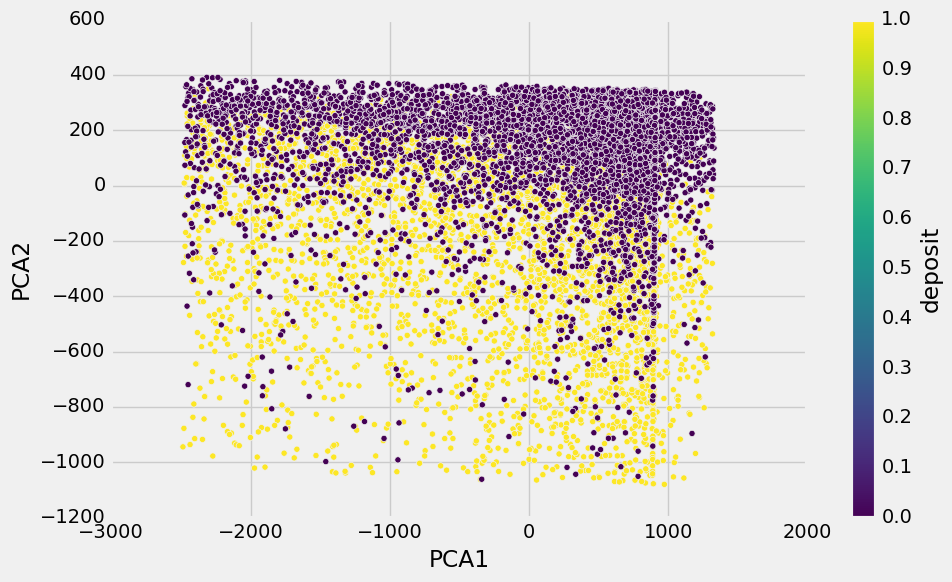

In [22]:
new_X.plot(kind="scatter", x="PCA1", y="PCA2",c="deposit",
          cmap=plt.cm.viridis)